In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from census import Census
from us import states
import gmaps
from config import cenkey
import scipy.stats as stats

In [4]:
#Open/read CSV file and look at table head()
death_pd = pd.read_csv("Causes_of_Death.csv")
death_pd.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [40]:
#Create table with mean of Age-adjusted death rates per cause from 1999-2016
#Drop "All causes" to focus on 10 leading causes
ppcauses = death_pd.groupby(["Year", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
leadcause = ppcauses.drop("All causes", axis=1)
means = leadcause.mean()
leadcause = pd.DataFrame(means).reset_index()
leadcause.columns = ["Cause Name", "Rate"]
leadcause.sort_values('Rate',inplace=True)
leadcause

,Cause Name,Rate
8,Suicide,13.235470
6,Kidney disease,14.139423
5,Influenza and pneumonia,18.389103
3,Diabetes,23.471902
0,Alzheimer's disease,24.618697
9,Unintentional injuries,42.827671
1,CLRD,44.644658
7,Stroke,46.358333
2,Cancer,179.898825
4,Heart disease,199.782372


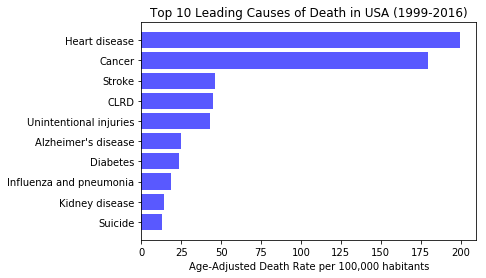

In [42]:
#Create a horizontal bar plot on descending order to show leading causes of death in USA
x = leadcause["Cause Name"]
y = leadcause["Rate"]

plt.barh(x, y, color='blue', alpha=0.65, align="center")
plt.title("Top 10 Leading Causes of Death in USA (1999-2016)")
plt.xlabel("Age-Adjusted Death Rate per 100,000 habitants")
plt.savefig("Leading Causes of Death USA.png")
plt.show()

In [59]:
#Group the years and plot the trend of the diseases in each group of years
bins = [1998, 2005, 2011, 2016]
group_names = ["1999-2004", "2005-2010", "2011-2016"]

death_pd["Year Range"] =pd.cut(death_pd["Year"], bins, labels=group_names)
death_by_year = death_pd.groupby(["Year Range", "Cause Name"]).sum()["Deaths"].unstack(level=-1)
death_by_year

Cause Name,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year Range,,,,,,,,,,,
1999-2004,33896964,815666,1746642,7768140,1009594,9645414,889172,564128,2225158,434772,1486274
2005-2010,29486032,953940,1623946,6814588,851982,7316420,645884,570062,1588938,437448,1465050
2011-2016,26447136,977218,1498864,5906344,771182,6188532,542882,481770,1346184,427466,1404444


In [60]:
deaths_year = death_pd.groupby(["Year Range", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
deaths_year

Cause Name,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year Range,,,,,,,,,,,
1999-2004,855.592308,21.825275,45.512637,194.307967,25.683791,234.679945,22.198077,14.180220,56.832967,12.092857,40.211538
2005-2010,778.814423,25.708333,44.478846,176.981731,22.516346,185.177885,16.665385,14.892308,41.828526,13.163141,42.831410
2011-2016,751.354615,27.221923,43.628462,163.226538,21.521923,168.451154,15.125000,13.178846,37.129615,14.921923,46.485769


In [61]:
deaths_year = deaths_year.drop("All causes", axis=1)
deaths_year

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year Range,,,,,,,,,,
1999-2004,21.825275,45.512637,194.307967,25.683791,234.679945,22.198077,14.180220,56.832967,12.092857,40.211538
2005-2010,25.708333,44.478846,176.981731,22.516346,185.177885,16.665385,14.892308,41.828526,13.163141,42.831410
2011-2016,27.221923,43.628462,163.226538,21.521923,168.451154,15.125000,13.178846,37.129615,14.921923,46.485769


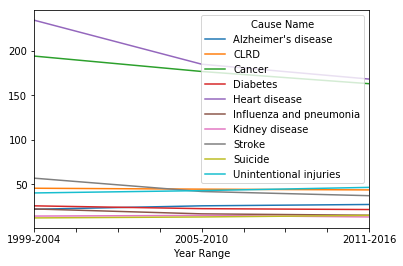

In [39]:
#Plot the trend of the diseases in each group of years
deaths_year.plot(kind="line")

# Null Hypothesis #1

-The trend observed for Heart disease and Cancer (meaning, the decrease on age-adjusted death rate per 100,000 habitants) does not represent a significant change. 

In [ ]:
#Test the null hypothesis with T-test



In [57]:
#Create a table showing data per year on each State during 1999-2016
by_state= death_pd[['State','Cause Name','Year','Deaths']]
state_grouped= by_state.groupby(['State', 'Cause Name'])
state_grouped.first()

Year  Deaths
State         Cause Name                           
Alabama       All causes               2014   50215
              Alzheimer's disease      1999     772
              CLRD                     2000    2057
              Cancer                   2016   10419
              Diabetes                 2016    1183
              Heart disease            2016   12832
              Influenza and pneumonia  2016     987
              Kidney disease           2016    1012
              Stroke                   2013    2604
              Suicide                  2003     521
              Unintentional injuries   2012    2283
Alaska        All causes               2013    3997
              Alzheimer's disease      1999      24
              CLRD                     2015     204
              Cancer                   2016     995
              Diabetes                 2009      84
              Heart disease            2013     706
              Influenza and pneumonia  2015      41
              Kidney disease           2002      21
              Stroke                   2014     157
              Suicide                  2001     102
              Unintentional injuries   2005     313
Arizona       All causes               2014   51538
              Alzheimer's disease      1999     963
              CLRD                     2014    3396
              Cancer                   2016   11876
              Diabetes                 2009    1083
              Heart disease            2014   10805
              Influenza and pneumonia  2015     775
              Kidney disease           2014     325
...                                     ...     ...
West Virginia Cancer                   2016    4659
              Diabetes                 2012     741
              Heart disease            2016    4767
              Influenza and pneumonia  2016     423
              Kidney disease           1999     345
              Stroke                   2013     983
              Suicide                  1999     229
              Unintentional injuries   1999     798
Wisconsin     All causes               2009   45697
              Alzheimer's disease      2000    1177
              CLRD                     2012    2524
              Cancer                   2016   11498
              Diabetes                 2009    1110
              Heart disease            2016   11526
              Influenza and pneumonia  2016     888
              Kidney disease           1999     677
              Stroke                   2016    2481
              Suicide                  2000     590
              Unintentional injuries   1999    1955
Wyoming       All causes               2016    4722
              Alzheimer's disease      2013     126
              CLRD                     2016     327
              Cancer                   2015     931
              Diabetes                 2013      89
              Heart disease            2013     939
              Influenza and pneumonia  2016      99
              Kidney disease           1999      30
              Stroke                   2014     189
              Suicide                  2001      83
              Unintentional injuries   2004     243

[572 rows x 2 columns]

In [ ]:
#Create a table with mean of age-adjusted rate per State and disease during 1999-2016 period



In [ ]:
#Create a heat map showing deaths rates for Heart Disease



In [ ]:
#Create a heat map showing deaths rates for Cancer



In [ ]:
#Organize in a table top 10 States with most deaths rates



# Null Hypothesis #2

-The suicide rate is not significantly relate to lower temperatures throught the year.

In [ ]:
#Create a table with mean of age-adjusted rate per State and suicide



In [ ]:
#Create a heat map showing deaths rates for suicide



In [ ]:
#Test the null hypothesis with ANOVA test?



In [ ]:
#Do a map with most common age-adjusted cause of death by state in these 15 years

